In [9]:
import cortex
import numpy as np
from os.path import join
from cortex.options import config
import h5py

Note: for this to work, need to point the cortex config filestor to the `ds003020/derivative/pycortex-db` directory.
This might look something like `/home/chansingh/mntv1/deep-fMRI/data/ds003020/derivative/pycortex-db/UTS03/anatomicals/`

In [20]:
results_dir = '/home/chansingh/mntv1/deep-fMRI/results/encoding/bert-10__ndel=4/UTS03/'
corrs = np.load(join(results_dir, 'corrs.npz'))['arr_0']
corrs.shape

(95556,)

In [4]:
volume = cortex.Volume.random(subject='UTS03', xfmname='UTS03_auto')
cortex.quickshow(volume, with_curvature=True, with_sulci=True)

RuntimeError: Inkscape doesn't seem to be installed on this system.SVGOverlay.get_texture requires inkscape.Please make sure that inkscape is installed and that is accessible from the terminal.

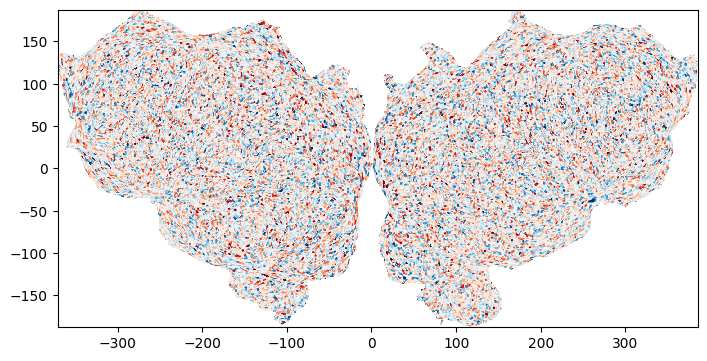

In [25]:
cortex.Volume(corrs, 'UTS03', xfmname='UTS03_auto')
cortex.quickshow(volume, with_rois=False) #, with_curvature=True, with_sulci=True)

In [15]:
sloth = '/home/chansingh/mntv1/deep-fMRI/data/ds003020/derivative/preprocessed_data/UTS03/sloth.hf5'
hf = h5py.File(sloth, "r")
# resp.extend(hf["data"][:])
# hf.close()

In [16]:
hf.keys()

<KeysViewHDF5 ['data']>

In [17]:
hf['data']

<HDF5 dataset "data": shape (437, 95556), type "<f8">

In [ ]:
vol = cortex.Volume()

RuntimeError: Inkscape doesn't seem to be installed on this system.SVGOverlay.get_texture requires inkscape.Please make sure that inkscape is installed and that is accessible from the terminal.

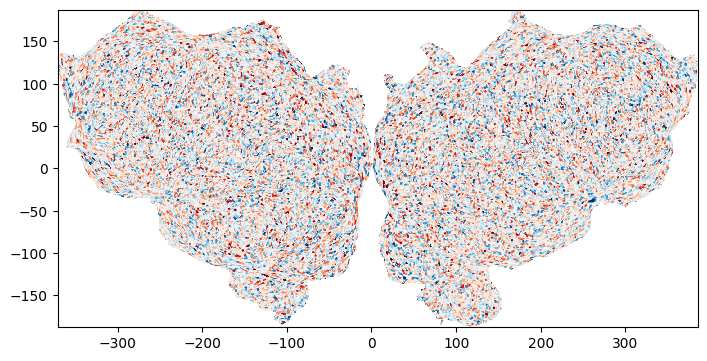

In [6]:
cortex.quickshow(volume, )

In [7]:
!ls '/home/chansingh/mntv1/deep-fMRI/data/ds003020/derivative/pycortex-db/'

UTS01  UTS02  UTS03  UTS04  UTS05  UTS06  UTS07  UTS08


In [8]:
!du -sh /home/chansingh/mntv1/deep-fMRI/data/ds003020/derivative/pycortex-db/

0	/home/chansingh/mntv1/deep-fMRI/data/ds003020/derivative/pycortex-db/


In [5]:
print(config.get('basic', 'filestore'))

/home/chansingh/.embgam/share/pycortex/db


In [9]:
!ls /home/chansingh/.embgam/share/pycortex/db

anatomicals  cache  overlays.svg  surface-info	surfaces  transforms


In [10]:
print(cortex.options.usercfg)


/home/chansingh/.config/pycortex/options.cfg
